In [1]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

# Introduction

It is hypothesized that zonally asymmetric thermal forcing (land-ocean heating contrasts) is a primary driver of planetary geostrophic motion. Under global warming, Arctic Amplification—the rapid warming of the Arctic relative to the equator—weakens the meridional temperature gradient, subsequently reducing the mean zonal wind speed (U).

This study examines how weakening wind alters atmospheric dynamics. Specifically, the transition where the atmospheric response to surface heating shifts from being confined near the surface (in strong winds) to propagating vertically throughout the troposphere (in weak winds). This deep vertical propagation is theorised to significantly increase the amplitude of planetary waves, resulting in a 'wavier' jet stream. Understanding this dynamical shift is critical, as high-amplitude jet stream meanders are a known mechanism driving persistent extreme weather events, including blocking patterns, heat domes, and prolonged flooding.

This methodology contrasts with other studies regarding jet stream waviness. Many studies have focused on factors at smaller scales compared to the planetary-scale seen in our research. Other studies (Mann et al., 2017) have attributed wavier jets to synoptic-scale quasi-geostrophic forcings as they pertain to the Quasi-Resonance Amplification of jet stream waves. To test this idea, we solve the governing linearised planetary geostrophic equation regarding the fundamental process of heat transport across the atmosphere vertically, comparing the strong wind regime with the weak wind regime to observe the changes in wave propagation.

# Equations

Let $P_L$ be a pressure field in the atmosphere, and $\theta_L$ a potential temperature in the atmosphere. Let

$$u_L = -\frac{\partial P_L}{\partial y},\qquad v_L=\frac{\partial P_L}{\partial x},\qquad \theta_L=\frac{\partial P_L}{\partial z}.\qquad(1)$$

We apply the [Sverdrup relationship](https://en.wikipedia.org/wiki/Sverdrup_balance) to relate the average density profile $\rho_s$, the $z$-velocity (denoted $w_L$), the $x$-velocity, and the rate of change of the coriolis parameter $\beta_L=\frac{\partial f}{\partial z}$:

$$\frac{1}{\rho_s}\frac{\partial}{\partial z}(\rho_sw_L)-\beta_Lv_L=0.\qquad(2)$$

Moon and Cho showed that the leading-order dynamics of geostrophic motion are goverened by the planetary geostrophic equations:

$$\frac{\partial \theta_L}{\partial t}+u_L\frac{\partial \theta_L}{\partial x}+v_L\frac{\partial\theta_L}{\partial y}+w_L\left(S+\frac{\partial\theta_L}{\partial z}\right)=Q_L,\qquad(3)$$

where $S$ is the dimensionless vertical stability **(what?)** and $Q_L$ is some thermal forcing. We now assume that the dominant flow is a zonal mean barotropic wind $U$ driven by mean pressure $P_L^S=-Uy$ such that $P_L=P^S_L+\phi_L$ for some small perturbation $\phi_L$ generated by $Q_L$. Then we may linearize the steady-state geostrophic equations to find

$$U\frac{\partial}{\partial x}\frac{\partial\phi_L}{\partial z}+Sw_L=Q_L,\qquad(4)$$

$$\left(\frac{\partial}{\partial z}-\frac{1}{H}\right)w_L=\beta_L\frac{\partial\phi_L}{\partial x},\qquad(5)$$

where $\frac{1}{\rho_s}\frac{\partial\rho_s}{\partial z}=-\frac{1}{H}$ with $H$ some constant scale height. We now explicitly describe our forcing by $Q_L=-\left(k_s+\frac{1}{H}\right)Q_0G(x)e^{-k_sz}$. Then combining equations (4) and (5) we find

$$U\frac{\partial}{\partial x}\frac{\partial}{\partial z}\left(\frac{\partial}{\partial z}-\frac{1}{H}\right)\phi_L+\beta_LS\frac{\partial \phi_L}{\partial x}=-\left(k_s+\frac{1}{H}\right)Q_L.\qquad(6)$$

Finally we integrate with respect to $x$ and $y$ (the so-called *zonal integration*) **(is this right?)** to compute our primary equation of study:

$$\frac{\partial^2\phi_L}{\partial z^2}-\frac{1}{H}\frac{\partial\phi_L}{\partial z}+\frac{\beta_LS}{U}\phi_L=-\left(k_s+\frac{1}{H}\right)\frac{Q_0}{U}F(x)e^{-k_sz}.\qquad(7)$$

# Numerical methods

Recall that our goal is to study the equation
$$\frac{\partial^2\phi_L}{\partial z^2}-\frac{1}{H}\frac{\partial\phi_L}{\partial z}+\frac{\beta_LS}{U}\phi_L=-\left(k_s+\frac{1}{H}\right)\frac{Q_0}{U}F(x)e^{-k_sz}.\qquad(7)$$
We have a number of constants in the above equation:

* $\beta_L$ is the rate of change of the coriolis parameter with respect to meridional distance ($\beta_L=\frac{\partial f}{\partial x}$), where we parameterize $f$ linearly.
* $H$ is a constant scale height to account for how density changes with respect to height.
* $S$ is the dimensionless vertical stability.
* $k_s$ is a constant to treat thermal forcing adjacent to the surface.
* $Q_0$ is the amplitude of some zonally asymmetric thermal forcing.

We solve this equation using three different methods: Forward Differencing (Discretization), Analytical (as provided by the study), and utilising Pre-built solvers. By using these methods in tandem, we can obtain an accurate depiction of the phenomenon the equation suggests and compare the results gained from each method with one another to ensure robustness of findings.

In [2]:
# constants
beta = 1.0
H = 0.5
S = 1.0
k_s = 2.0
Q_0 = 1.0

## Discretized solution

Here we discretize (7):
$$\frac{\phi_L(z_{i+1})-2\phi_L(z_{i})+\phi_L(z_{i-1})}{(\Delta z)^2}-\frac{1}{H}\frac{\phi_L(z_{i+1})-\phi_L(z_{i})}{\Delta z}+\frac{\beta_LS}{U}\phi_L(z_i)=-\left(k_s+\frac{1}{H}\right)\frac{Q_0}{U}F(x)e^{-k_sz}.$$

Using this discretization we formuate numerical approximation as a matrix inverse problem: Letting $A$ be the matrix with entries
$$a_{ij}=\begin{cases} \frac{1}{dz^2} - \frac{1}{2Hdz} & \text{on the upper diagonal,}\\ \frac{-2}{dz^2} + \frac{\beta_LS}{U} & \text{on the main diagonal,}\\ \frac{1}{dz^2} + \frac{1}{2Hdz}& \text{on the lower diagonal,}\\0&\text{otherwise,}\end{cases}$$

we may reformulate the discretized equation (7) into the form

$$A\phi_L=b$$

where $b$ is the vector representing our forcing. Now we may develop the structure necessary for this discretization, as below.

In [3]:
# stepping
nx, nz = 1000, 1000
z_T = 1.0

# pre-allocate arrays
x = np.linspace(0, 2*np.pi, nx)
z = np.linspace(0, z_T, nz)
dz = z[1] - z[0]

E = np.ones(nz)
def solve_z(U, Fx):

    diags = [( (1/dz)**2 - (1/(2*H*dz)) )*E, ( (-2/(dz**2)) + ((beta*S)/U) )*E, ( (1/dz**2) + (1/(2*H*dz)) )*E] # upper, main, lower
    A = np.matrix(sp.sparse.diags(diags, [1,0,-1]).toarray())

    b = -(k_s + (1/H))*(Q_0/U)*Fx*np.exp(-k_s*z) # forcing

    return np.linalg.solve(A, b)

### Boundary conditions

We consider boundary conditions determined by $w_L|_{z_0,z_T}=\left.\frac{\partial P_L}{\partial z}\right|_{z_0,z_T}=0$, where $z_0$ is the surface and $z_T$ is the maximum height under consideration. These conditions translate to the following statement about $\phi_L$ on the boundaries:

$$\frac{\partial\phi_L}{\partial z}=\frac{Q_0}{U}F(x)e^{-k_sz},$$

which is precisely the forcing term.

In [4]:
def solve_withboundary(U, Fx):
    diags = [( (1/dz)**2 - (1/(2*H*dz)) )*E, ( (-2/(dz**2)) + ((beta*S)/U) )*E, ( (1/dz**2) + (1/(2*H*dz)) )*E] # upper, main, lower
    A = np.matrix(sp.sparse.spdiags(diags, [1,0,-1], nz, nz).toarray())

    # boundary conditions for phi
    A[0,0] = -1
    A[0,1] = 1
    A[nz-1,nz-1] = 1
    A[nz-1,nz-2] = -1

    b = -(k_s + (1/H))*(Q_0/U)*Fx*np.exp(-k_s*z) # forcing

    # boundary conditions for forcing
    b[0] = Fx*(Q_0/U)*dz
    b[nz-1] = 0

    return np.linalg.solve(A, b)

Below we run the discretized model described above and plot the results. Before we do so, two subtleties must be observed: The solution to equation (7) depends on the sign of the discriminant. That is, whether $U>4H^2\beta_LS=1$ or $U<4H^2\beta_LS=1$ will influence our solution. Therefore we consider two perturbations of this, $U=1.5$ and $U=0.5$.

The second note is that we have not yet defined $F(x)$, our forcing function. For this model we consider

$$F(x)=\frac{\sin(2x)}{2}.$$

Now we solve for $\phi$ and for the pressure $P=-yU+\phi$ for $U=1.5$ (strong) and $U=0.5$ (weak).

In [5]:
F = lambda x: (np.sin(2*x) / 2)

density_weight = np.exp(-z / (2*H))

U_strong = 1.5
soln_strong = math.nan*np.zeros([nz,nx])

for i in range(0,nx):
    soln_strong[:,i] = solve_withboundary(U_strong, F(x[i]))

U_weak = 0.5
soln_weak = math.nan*np.zeros([nz,nx])

for i in range(0,nx):
    soln_weak[:,i] = solve_withboundary(U_weak, F(x[i]))

Now that we have these solutions, we compute maxima and minima for scaling display figures.

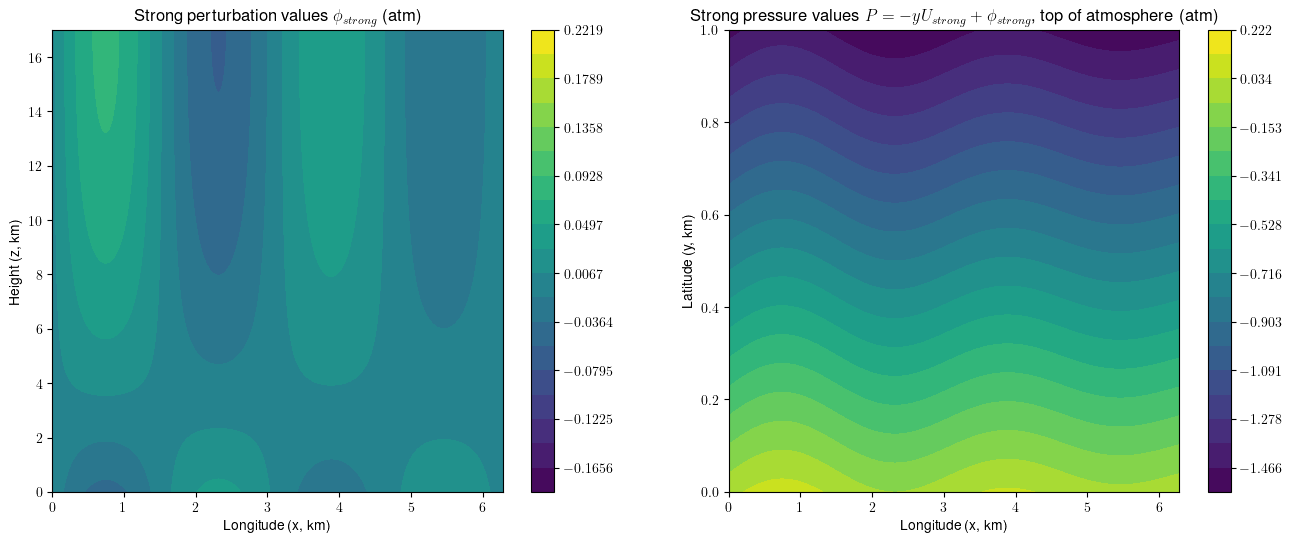

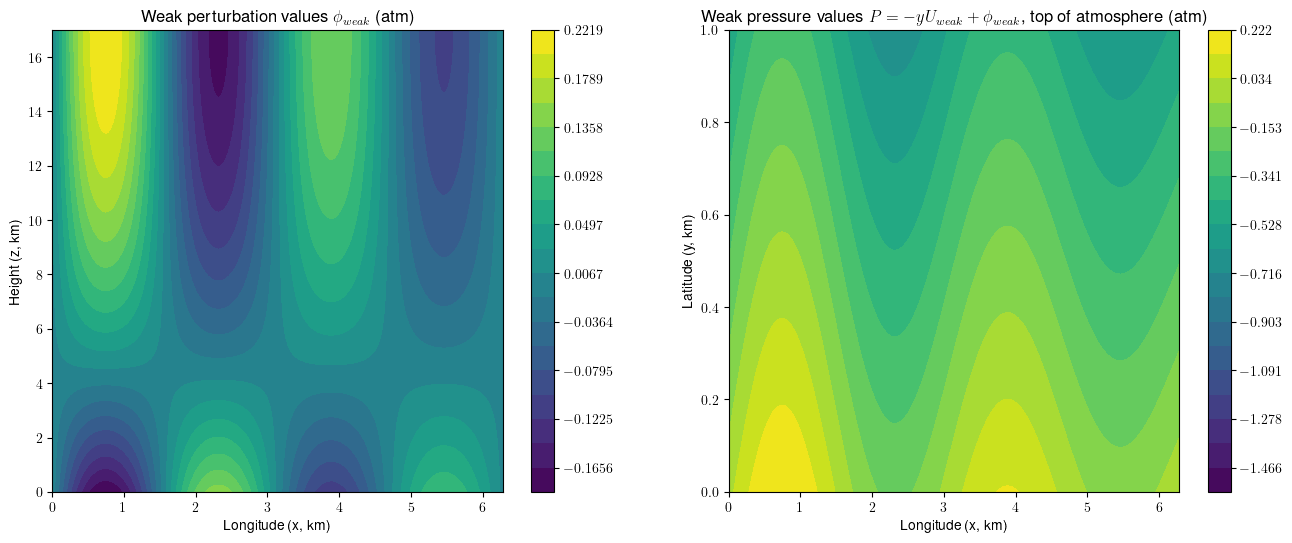

In [6]:
phimax = np.max([np.max(soln_strong*density_weight), np.max(soln_weak*density_weight)])
phimin = np.min([np.min(soln_strong*density_weight), np.min(soln_weak*density_weight)])

y = np.linspace(0, 1, 50)
xgrid, ygrid = np.meshgrid(x,y)
soln_strong_grid, tmp = np.meshgrid((soln_strong*density_weight)[-1,:], y)
soln_weak_grid, tmp = np.meshgrid((soln_weak*density_weight)[-1,:], y)

p_strong = -1.5*ygrid + soln_strong_grid
p_weak = -0.5*ygrid + soln_weak_grid

pmax = np.max([np.max(p_strong), np.max(p_weak)])
pmin = np.min([np.min(p_strong), np.min(p_weak)])

def strong_discretized_figs():
    # strong perturbation values
    fig, ax = plt.subplots(1, 2, figsize=[16,6])
    philevels = np.linspace(phimin, phimax, 20)
    phicontourset = ax[0].contourf(x, 17*z, soln_strong*density_weight, levels=philevels)
    plt.colorbar(phicontourset)
    ax[0].set_title("Strong perturbation values $\phi_{\t{strong}}$ (atm)")
    ax[0].set_xlabel("Longitude (x, radians)")
    ax[0].set_ylabel("Height (z, km)")

    # strong pressure values
    plevels = np.linspace(pmin, pmax, 20)
    pcontourset = ax[1].contourf(x, y, p_strong, levels=plevels)
    plt.colorbar(pcontourset)
    ax[1].set_title("Strong pressure values $P=-yU_{\t{strong}}+\phi_{\t{strong}}$, top of atmosphere (atm)")
    ax[1].set_xlabel("Longitude (x, radians)")
    ax[1].set_ylabel("Latitude (y, km)")

def weak_discretized_figs():
    # weak perturbation values
    fig, ax = plt.subplots(1, 2, figsize=[16,6])
    philevels = np.linspace(phimin, phimax, 20)
    phicontourset = ax[0].contourf(x, 17*z, soln_weak*density_weight, levels=philevels)
    plt.colorbar(phicontourset)
    ax[0].set_title("Weak perturbation values $\phi_{\t{weak}}$ (atm)")
    ax[0].set_xlabel("Longitude (x, radians)")
    ax[0].set_ylabel("Height (z, km)")

    # weak pressure values
    plevels = np.linspace(pmin, pmax, 20)
    pcontourset = ax[1].contourf(x, y, p_weak, levels=plevels)
    plt.colorbar(pcontourset)
    ax[1].set_title("Weak pressure values $P=-yU_{\t{weak}}+\phi_{\t{weak}}$, top of atmosphere (atm)")
    ax[1].set_xlabel("Longitude (x, radians)")
    ax[1].set_ylabel("Latitude (y, km)")

strong_discretized_figs()
weak_discretized_figs()

## Analytic solution

The authors provide analytic solutions to (7) under the boundary conditions described above. The solutions depend on the sign of the discriminant of the characteristic polynomial. We provide both solutions below.

Let

$$q=\sqrt{\frac{1}{4H^2}-\frac{\beta_LS}{U}}$$

and

$$m = \sqrt{\frac{\beta_LS}{U}-\frac{1}{4H^2}}.$$

Then the analytic solutions are of the form

\begin{align*}
\text{Strong wind:}\quad\phi_L&=\frac{Q_0F(x)}{U(k_s^2+\frac{1}{H}k_s)+\beta_LS}\left(-\frac{e^{\frac{1}{2H}-q}-e^{-k_s}}{2e^{\frac{1}{2H}}\sinh(q)}e^{\left(\frac{1}{2H}+q\right)z}+\frac{e^{\frac{1}{2H}+q}-e^{-k_s}}{2e^{\frac{1}{2H}}\sinh(q)}e^{\left(\frac{1}{2H}-q\right)z}-\left(k_s+\frac{1}{H}\right)e^{-k_sz}\right)\\ \\
&=A_0F(x)\left(B_0f_0(z)-C_0g_0(z)-D_0h_0(z)\right)
\end{align*}

\begin{align*}
\text{Weak wind:}\quad\phi_L&=\frac{Q_0F(x)}{U(k_s^2+\frac{1}{H}k_s)+\beta_LS}\frac{\sqrt{\beta_LS}}{\sqrt{U}}e^{\frac{z}{2H}}\left(\frac{-\sin(mz-m-\psi)+e^{-\left(k_s+\frac{1}{2H}\right)}\sin(mz-\psi)}{\sin(m)}\right)-\frac{Q_0\left(k_s+\frac{1}{H}\right)F(x)}{U(k_s^2+\frac{1}{H}k_s)+\beta_LS}e^{-k_sz}\\ \\
&=A_1F(x)f_1(z)g_1(z)+A_0F(x)h_1(z)
\end{align*}

We have labeled the functions above for ease of readability in the code. Constants are all marked by capital letters, functions by the addition of a parameter, and each term is presented in the same order as in the equation above it.

In [7]:
def analytic(x, z, U, weak):
    A_0 = Q_0 / (U *( k_s**2 + (1 / H)*k_s ) *beta*S)
    
    if weak == 0:
        q = np.sqrt( ( 1 / (4*(H**2)) ) - ( (beta*S) / (U) ) )

        # positive discriminant
        B_0 = (np.exp((1/(2*H))-q) - np.exp(-k_s)) / (2*np.exp(1/(2*H))*np.sinh(q))
        C_0 = (np.exp((1/(2*H))+q) - np.exp(-k_s)) / (2*np.exp(1/(2*H))*np.sinh(q))
        D_0 = (k_s + (1/H))
        f_0 = np.exp( ( (1/(2*H)) + q )*z )
        g_0 = np.exp( ( (1/(2*H)) - q )*z )
        h_0 = np.exp(-k_s * z)
    
        phi_L = A_0*F(x)*( -B_0*f_0 + C_0*g_0 - D_0*h_0 )

    elif weak == 1:
        m = np.sqrt( ( ((beta*S) / (U)) - ((1) / (4*(H**2))) ) )
        psi = 0 # ???
 
        # negative discriminant
        A_1 = A_0*( (np.sqrt(beta*S)) / (np.sqrt(U)) )
        B_1 = A_0*(k_s+(1/H))
        f_1 = np.exp(z / (2*H))
        g_1 = ( np.sin(m*z - m-psi) - np.exp(k_s+(1/(2*H)))*np.sin(m*z-psi) ) / (np.sin(m))
        h_1 = np.exp(-k_s * z)

        phi_L = A_1*F(x)*f_1*g_1 + B_1*F(x)*h_1

    return phi_L

With a function to compute these analytic solutions in hand we now may compute solutions across all values of $x$ and $z$, as well as computing $P=-yU+\phi$ for these analytic solutions.

In [8]:
analytic_soln_strong = analytic(x,z,1.5, 0)
analytic_soln_weak = analytic(x,z,0.5, 1)

analytic_soln_strong = math.nan*np.zeros([nz,nx])

for i in range(0,nx):
    analytic_soln_strong[:,i] = analytic(F(x[i]), z, U_strong, 0)

analytic_soln_weak = math.nan*np.zeros([nz,nx])

for i in range(0,nx):
    analytic_soln_weak[:,i] = analytic(F(x[i]), z, U_weak, 1)

With these solutions we compute maxima and minima for scaling and draw figures.

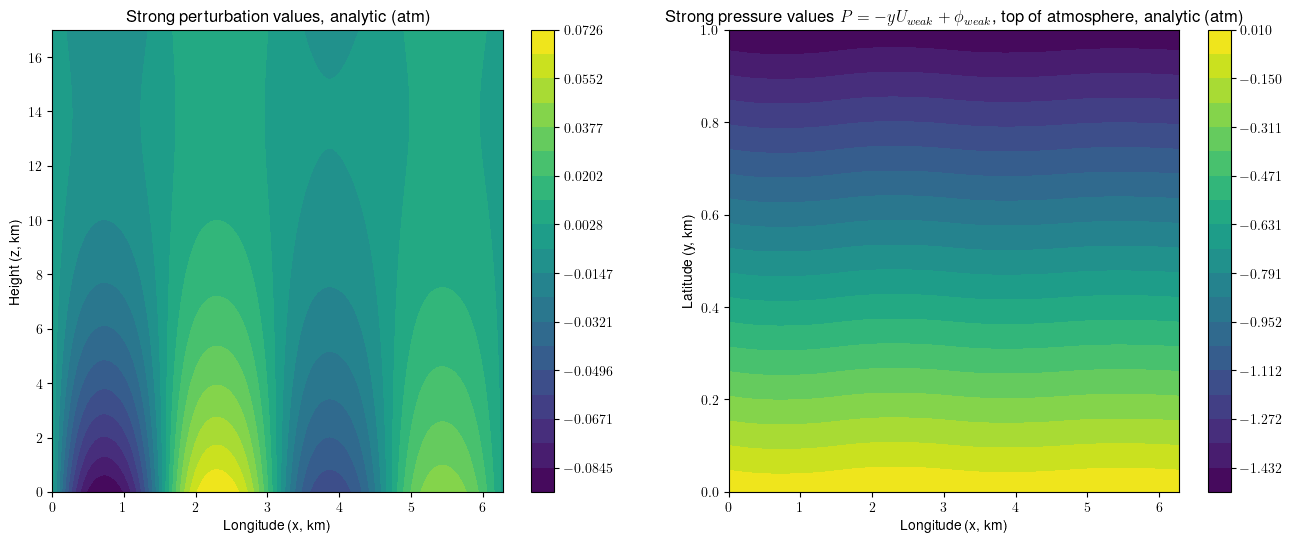

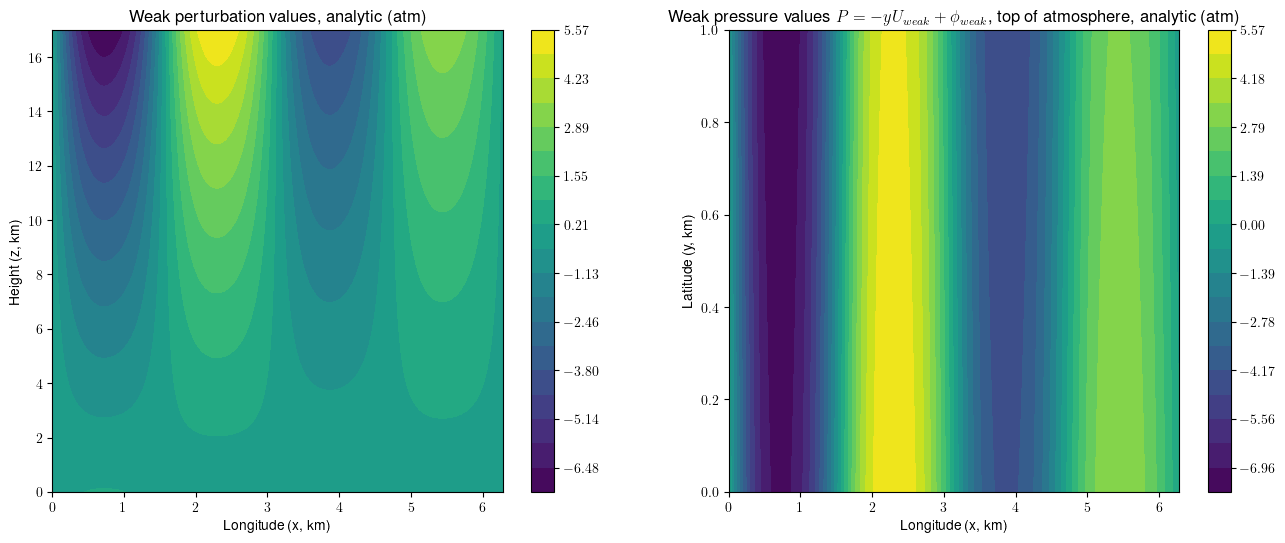

In [9]:
a_strong_grid, tmp = np.meshgrid((analytic_soln_strong*density_weight)[-1,:], y)
a_weak_grid, tmp = np.meshgrid((analytic_soln_weak*density_weight)[-1,:], y)

a_p_strong = -1.5*ygrid + a_strong_grid
a_p_weak = -0.5*ygrid + a_weak_grid

def strong_analytic_figs():
    # strong perturbation values
    fig, ax = plt.subplots(1, 2, figsize=[16,6])
    a_philevels = np.linspace((analytic_soln_strong*density_weight).min(), (analytic_soln_strong*density_weight).max(), 20)
    a_phicontourset = ax[0].contourf(x, 17*z, analytic_soln_strong*density_weight, levels=a_philevels)
    plt.colorbar(a_phicontourset)
    ax[0].set_title("Strong perturbation values, analytic (atm)")
    ax[0].set_xlabel("Longitude (x, radians)")
    ax[0].set_ylabel("Height (z, km)")

    # strong pressure values
    a_plevels = np.linspace((a_p_strong).min(), (a_p_strong).max(), 20)
    a_pcontourset = ax[1].contourf(x, y, a_p_strong, levels=a_plevels)
    plt.colorbar(a_pcontourset)
    ax[1].set_title("Strong pressure values $P=-yU_{\t{weak}}+\phi_{\t{weak}}$, top of atmosphere, analytic (atm)")
    ax[1].set_xlabel("Longitude (x, radians)")
    ax[1].set_ylabel("Latitude (y, km)")

def weak_analytic_figs():
    # weak perturbation values
    fig, ax = plt.subplots(1, 2, figsize=[16,6])
    a_philevels = np.linspace((analytic_soln_weak*density_weight).min(), (analytic_soln_weak*density_weight).max(), 20)
    a_phicontourset = ax[0].contourf(x, 17*z, analytic_soln_weak*density_weight, levels=a_philevels)
    plt.colorbar(a_phicontourset)
    ax[0].set_title("Weak perturbation values, analytic (atm)")
    ax[0].set_xlabel("Longitude (x, radians)")
    ax[0].set_ylabel("Height (z, km)")

    # weak pressure values
    a_plevels = np.linspace((a_p_weak).min(), (a_p_weak).max(), 20)
    a_pcontourset = ax[1].contourf(x, y, a_p_weak, levels=a_plevels)
    plt.colorbar(a_pcontourset)
    ax[1].set_title("Weak pressure values $P=-yU_{\t{weak}}+\phi_{\t{weak}}$, top of atmosphere, analytic (atm)")
    ax[1].set_xlabel("Longitude (x, radians)")
    ax[1].set_ylabel("Latitude (y, km)")

strong_analytic_figs()
weak_analytic_figs()

## Pre-built solution

Here we implement a pre-built solver, blackboxed via the SciPy `solve_bvp` function. We first write our equation (7) as a system of first order equations.

$$y=\frac{\partial\phi}{\partial z},\qquad y'=\frac{1}{H}y - \frac{\beta_LS}{U}\phi - \left(k_s + \frac{1}{H}\right)\frac{Q_0}{U}F(x)e^{-k_sz}.$$

In [13]:
def solve_builtin_for_x(x, U):
    F_x = F(x)

    def ode(z, y):
        U = 1.5
        phi, dphi = y
        d2phi = (1/H)*dphi - (beta*S/U)*phi - (k_s + (1/H))*(Q_0/U)*F_x*np.exp(-k_s*z)
        return np.vstack((dphi, d2phi))

    # boundary conditions
    bc = lambda ya, yb: np.array([ya[1],yb[1]])

    y_init = np.zeros((2, z.size))

    solution = sp.integrate.solve_bvp(ode, bc, z, y_init)

    z_sol = solution.x
    phi_sol = solution.y[0]

    return phi_sol

builtin_soln_strong = math.nan*np.zeros([nz, nx])

for i in range(0,nx):
    builtin_soln_strong[:, i] = solve_builtin_for_x(x[i], 1.5)

builtin_soln_weak = math.nan*np.zeros([nz, nx])

for i in range(0,nx):
    builtin_soln_weak[:, i] = solve_builtin_for_x(x[i], 0.5)

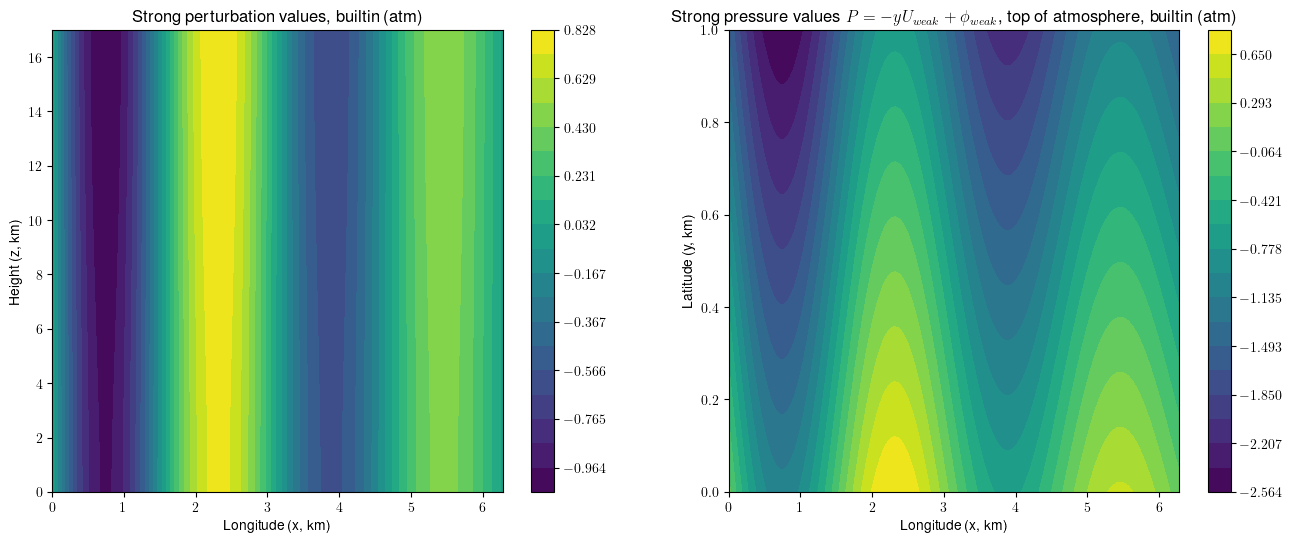

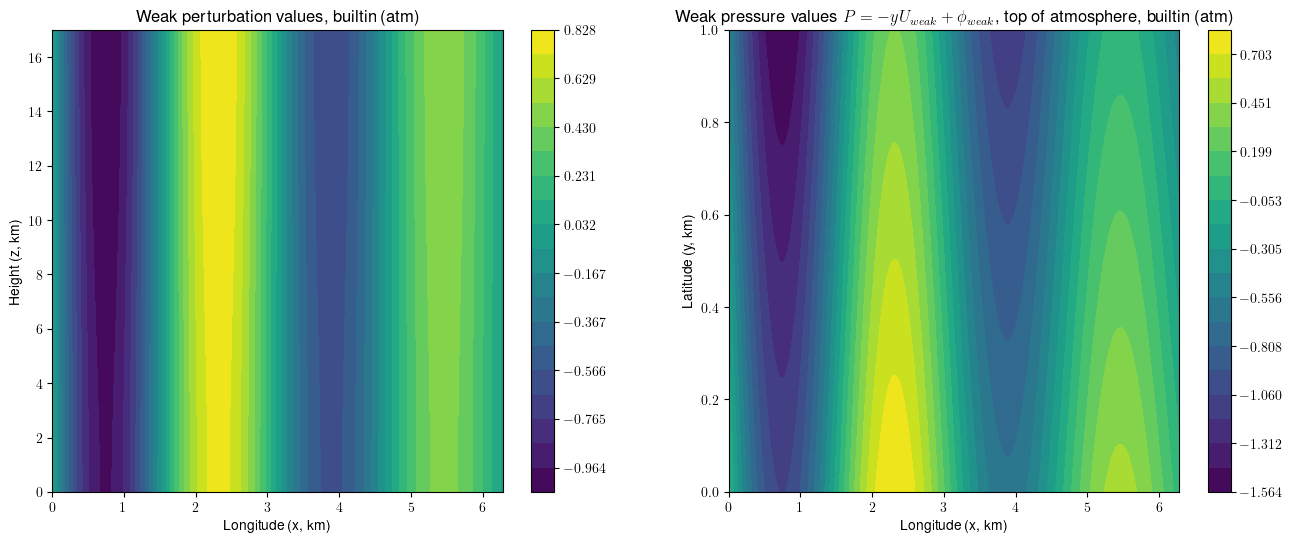

In [14]:
b_phimax = np.max([np.max(builtin_soln_strong*density_weight), np.max(builtin_soln_weak*density_weight)])
b_phimin = np.min([np.min(builtin_soln_strong*density_weight), np.min(builtin_soln_weak*density_weight)])

b_strong_grid, tmp = np.meshgrid((builtin_soln_strong*density_weight)[-1,:], y)
b_weak_grid, tmp = np.meshgrid((builtin_soln_weak*density_weight)[-1,:], y)

b_p_strong = -1.5*ygrid + b_strong_grid
b_p_weak = -0.5*ygrid + b_weak_grid

b_pmax = np.max([np.max(b_p_strong), np.max(b_p_weak)])
b_pmin = np.min([np.min(b_p_strong), np.min(b_p_weak)])

def strong_builtin_figs():
    # strong perturbation values
    fig, ax = plt.subplots(1, 2, figsize=[16,6])
    b_philevels = np.linspace((builtin_soln_strong*density_weight).min(), (builtin_soln_strong*density_weight).max(), 20)
    b_phicontourset = ax[0].contourf(x, 17*z, builtin_soln_strong*density_weight, levels=b_philevels)
    plt.colorbar(b_phicontourset)
    ax[0].set_title("Strong perturbation values, builtin (atm)")
    ax[0].set_xlabel("Longitude (x, radians)")
    ax[0].set_ylabel("Height (z, km)")

    # strong pressure values
    b_plevels = np.linspace((b_p_strong).min(), (b_p_strong).max(), 20)
    b_pcontourset = ax[1].contourf(x, y, b_p_strong, levels=b_plevels)
    plt.colorbar(b_pcontourset)
    ax[1].set_title("Strong pressure values $P=-yU_{\t{weak}}+\phi_{\t{weak}}$, top of atmosphere, builtin (atm)")
    ax[1].set_xlabel("Longitude (x, radians)")
    ax[1].set_ylabel("Latitude (y, km)")

def weak_builtin_figs():
    # weak perturbation values
    fig, ax = plt.subplots(1, 2, figsize=[16,6])
    b_philevels = np.linspace((builtin_soln_weak*density_weight).min(), (builtin_soln_weak*density_weight).max(), 20)
    b_phicontourset = ax[0].contourf(x, 17*z, builtin_soln_weak*density_weight, levels=b_philevels)
    plt.colorbar(b_phicontourset)
    ax[0].set_title("Weak perturbation values, builtin (atm)")
    ax[0].set_xlabel("Longitude (x, radians)")
    ax[0].set_ylabel("Height (z, km)")

    # weak pressure values
    b_plevels = np.linspace((b_p_weak).min(), (b_p_weak).max(), 20)
    b_pcontourset = ax[1].contourf(x, y, b_p_weak, levels=b_plevels)
    plt.colorbar(b_pcontourset)
    ax[1].set_title("Weak pressure values $P=-yU_{\t{weak}}+\phi_{\t{weak}}$, top of atmosphere, builtin (atm)")
    ax[1].set_xlabel("Longitude (x, radians)")
    ax[1].set_ylabel("Latitude (y, km)")

strong_builtin_figs()
weak_builtin_figs()

# Results

All numerical methods used the same simulation, revolving around the wind threshold outlined in the paper, where the strong wind parameter is 1.5 and the weak wind parameter is 0.5. 

All methods show signs of parallel to the findings seen in our research paper. Of the three, the Discretization method strongly mirrors that of the paper, while both our analytical and pre-built implementation contrast slightly. Despite this, both of these methods show trends congruent to the findings in the paper. 

When comparing the perturbations, we see that the discretized method shows the confinement of pressure perturbations found near the surface and the increase in magnitude of perturbations when under weak winds. The perturbations of both the analytical and pre-built methods show similar results visualizing the surface-confined perturbations, although exempt the atmospheric "leaking" perturbations towards the upper atmosphere. This still suggests that the theoretical discretization approach, when employing the forcing function, still showed similar results to the analytical, observational findings. 

When comparing the Top-of-atmosphere (TOA) pressure, we see very similar results across all three methods. the discreitzation and analytical methods both show results akin to the papers findings, where storng winds result in straight-line, stable TOA jet streaks while weak winds result in meandering, wavy jet streaks. Despite the magnitudes differing between these two methods, both are accurate and show the stark difference that occurs when changing the wind speed. When looking at the pre built solver method, we see a similar trend, however, there is not as much of a change in terms of waviness. Similar to the findings of the perturbations, it still visually supports the trend when seeing the other two methods. Moreover, it still also suggests an increase in pressure penetration when looking at the magnitude change between the strong and weak wind graphs. 

The models we explored support the hypothesis that arctic amplification can physically change planetary wave propagation by causing them to meander. When winds become weak, the thermal forcing from the land-ocean contrast is able to vertically interact with the jet stream, bending them into high-amplitude waves. 

The current model we reflected in our study is that of a "rigid lid" at the tropopause (z = 1). A more realistic approach would be the implementation of a radiating boundary condition, similar to an "uncapped" tropopause, to accurately depict westward tilt. moreover, a future study of this with the inclusion of a vertical wind shear forcing variable to test how it interacts with planetary waves could provide interesting results.

# Video Walkthrough

# References
W. Moon, B. Kim, G. Yang, & J.S. Wettlaufer, Wavier jet streams driven by zonally asymmetric surface thermal forcing, Proc. Natl. Acad. Sci. U.S.A. 119 (38) e2200890119, https://doi.org/10.1073/pnas.2200890119 (2022).

Mann, M. E., Rahmstorf, S., Kornhuber, K., Steinman, B. A., Miller, S. K., & Coumou, D. (2017). Influence of anthropogenic climate change on planetary wave resonance and extreme weather events. Scientific Reports, 7(1), 45242. https://doi.org/10.1038/srep45242

N. A. Phillips, Geostrophic motion. Rev. Geophys. 1, 123–175 (1963)

W. Moon, J. Y. Cho, A balanced state consistent with planetary-scale motion for quasi-geostrophic
dynamics. Tellus Ser. A Dyn. Meterol. Oceanogr. 72, 1–12 (2020).

# Workload Division

Connor: Equations, Numerical methods, Figures, Python Code

Sean: Introduction, Results, Video Walkthrough (editing), Matlab Code